# level 2 Task 2
Task:Price Range Analysis
Determine the most common price range
among all the restaurants.
Calculate the average rating for each price
range.
Identify the color that represents the highest
average rating among different price ranges. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe = pd.read_csv("zomato.csv")
dataframe.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [4]:
dataframe.dropna(inplace=True)

In [5]:
dataframe.isnull().sum()
dataframe.drop_duplicates(inplace=True)

In [6]:
print(dataframe.describe())

              votes
count  23193.000000
mean     601.074462
std     1114.854301
min        0.000000
25%      101.000000
50%      221.000000
75%      586.000000
max    16832.000000


In [7]:
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float)

In [8]:
dataframe['rate'] = dataframe['rate'].astype(str).str.replace('/5', '').str.strip()
dataframe['rate'] = pd.to_numeric(dataframe['rate'], errors='coerce')

In [21]:
most_common_price_range = dataframe['approx_cost(for two people)'].mode()[0]
most_common_price_range

400.0

In [23]:
avg_rating_by_price = dataframe.groupby('approx_cost(for two people)')['rate'].mean().reset_index()


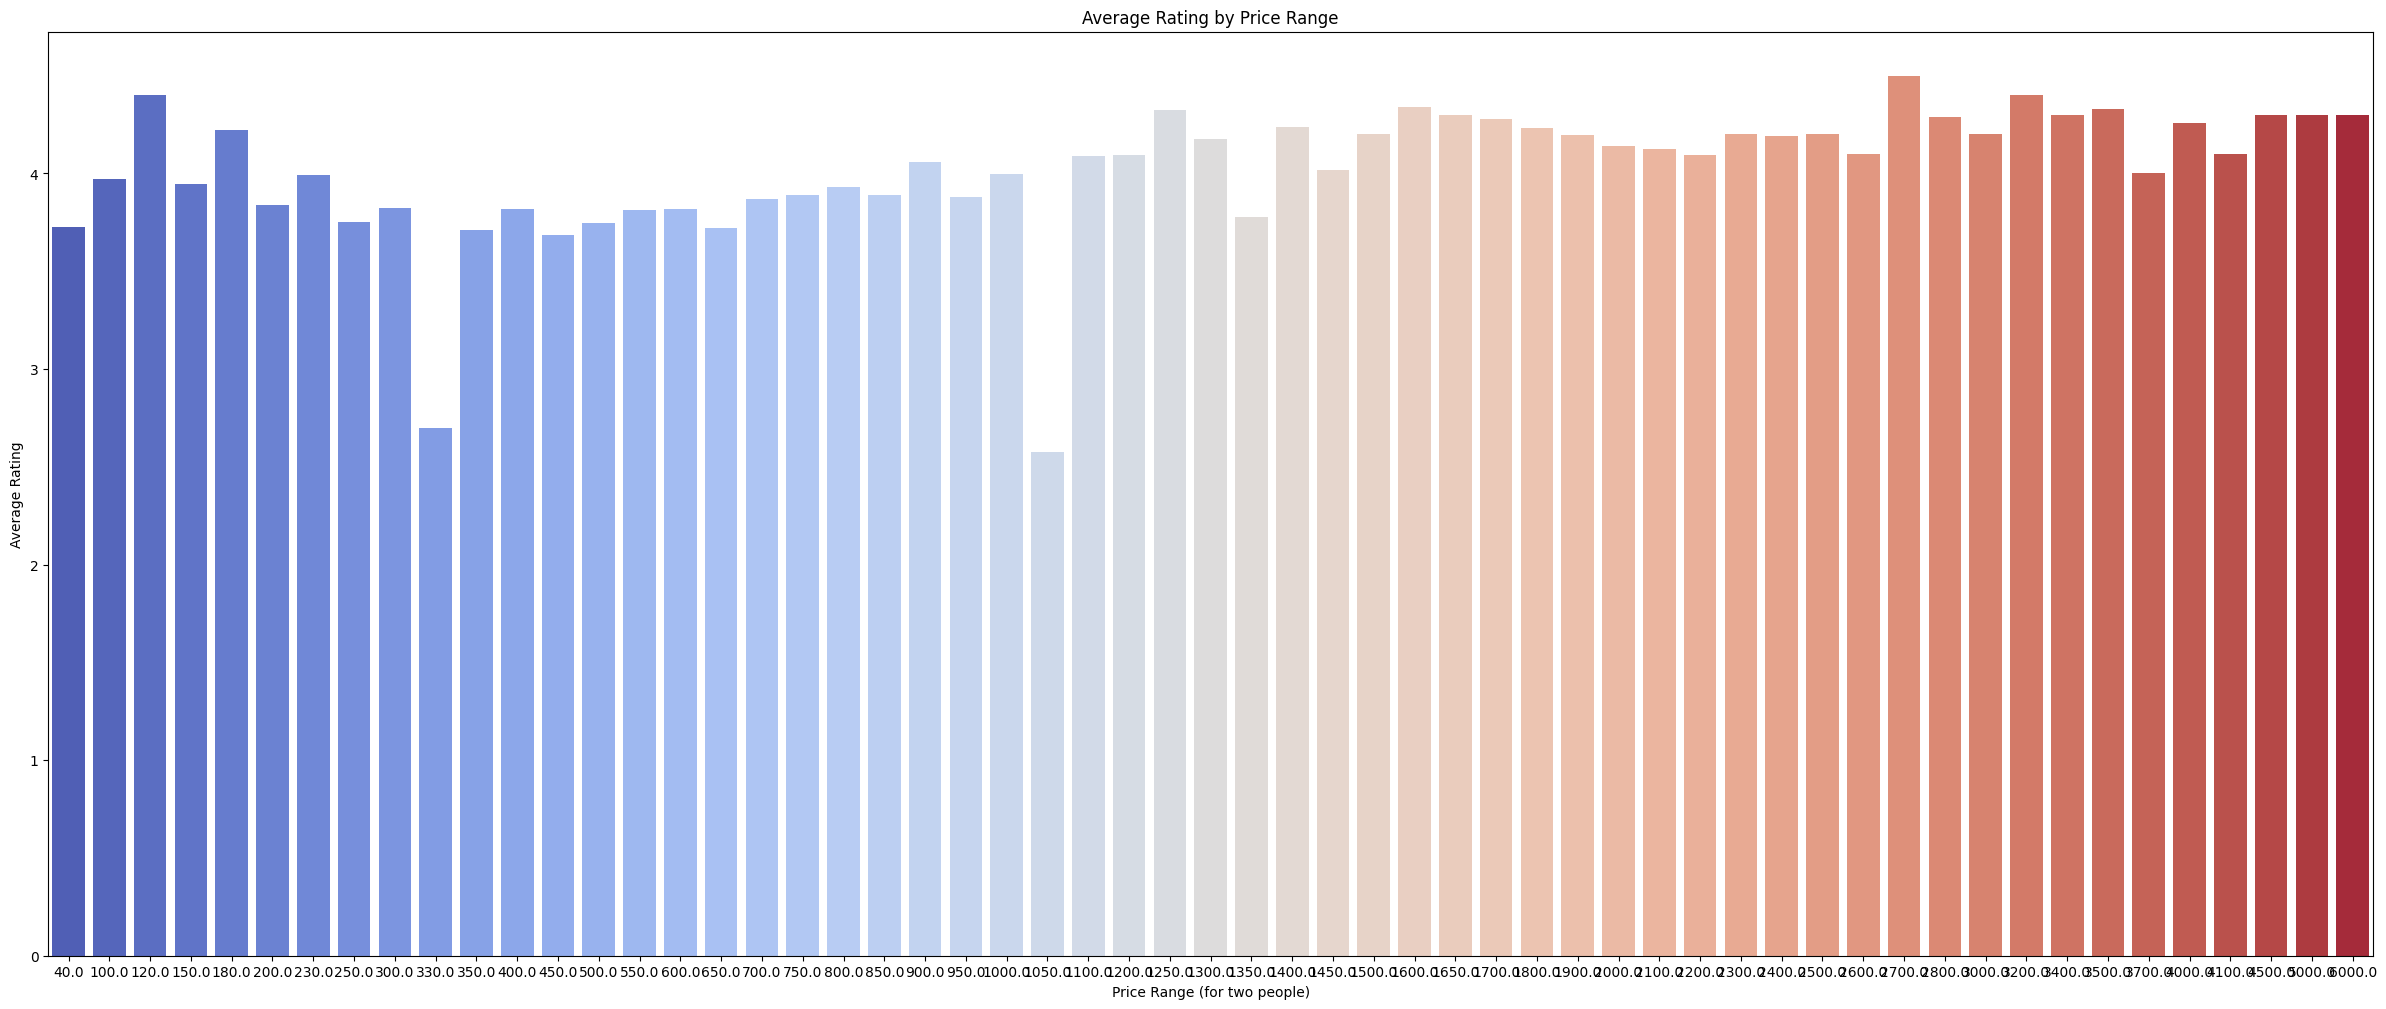

In [20]:
plt.figure(figsize=(30, 12))
palette = sns.color_palette("coolwarm", len(avg_rating_by_price))
sns.barplot(x='approx_cost(for two people)', y='rate', hue='approx_cost(for two people)', data=avg_rating_by_price, palette=palette, legend=False)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range (for two people)')
plt.ylabel('Average Rating')
plt.show()
